In [1]:
from IPython.display import display, Math, Latex

from sympy import Symbol, Matrix, init_printing, latex, simplify, diff, integrate, cos, expand
from sympy.printing.latex import print_latex
init_printing(use_latex=True, use_unicode=True)

In [2]:
x = Symbol('x')
L = Symbol('L')

u1 = Symbol('u_1')
u2 = Symbol('u_2')
N1 = 1 - x/L
N2 = x/L
nu = Symbol('ν')
E = Symbol('E')
gi = 2 + 2*nu
e11 = Symbol('e_11')
e22 = 0
e33 = 0
e12 = Symbol('e_12')
e23 = 0
e13 = Symbol('e_13')
e = Matrix([[e11, e22, e33, e12, e23, e13]]).T

o11 = Symbol('σ_{11}')
o22 = 0.
o33 = 0.
o12 = Symbol('σ_12')
o23 = 0.
o13 = 0
o = Matrix([[o11, o22, o33, o12, o23, o13]]).T

In [3]:
D = Matrix([
    [1, -nu, -nu, 0., 0., 0.],
    [-nu, 1, -nu, 0., 0., 0.],
    [-nu, -nu, 1, 0., 0., 0.],
    [0.,  0., 0., gi, 0., 0.],
    [0.,  0., 0., 0., gi, 0.],
    [0.,  0., 0., 0., 0., gi],
])
D /= E

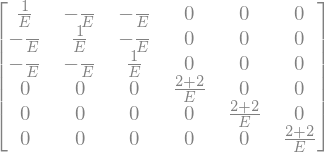

In [4]:
#D_latex = print_latex(D)
display(D)
#display(latex(D))

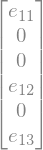

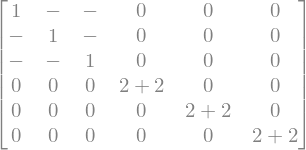

In [5]:
display(e)
display(D*E)
# display(D.inv())

In [35]:
a1 = Symbol('a1')
a1 = Symbol('a2')
# display(x,L)
# display(N1)
#print(N1,u1)
ua = N1*u1 + N2*u2
uap = N1*a1 + N2*a2
du_dx = diff(ua, x)
display(ua)
display(du_dx)
#b = e.substitute('e_11', u)
#display(b)
x
# diff(cos(x), x)

NameError: name 'a2' is not defined

D (6, 6)
e (6, 1)
eT (1, 6)


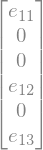

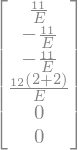

In [6]:
print('D', D.shape)
print('e', e.shape)
eT = e.T
print('eT', eT.shape)
Do = D * o
#print(De)
Do = Matrix(Do)
xl = latex(e) + latex(Do * E)
display(e, Do)


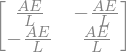

In [21]:
P = Symbol('P')
A = Symbol('A')

#N1 = 1 - x/L
#N2 = x/L
N1x = diff(N1, x)
N2x = diff(N2, x)
B = Matrix([N1x, N2x]).T
display(dN_dx)


dKe = B.T * E * B * A
Kei = integrate(dKe, x)
Ke = Kei.subs(x, L) - Kei.subs(x, 0)
display(Ke)

# Apply Strain Energy

http://www.sjsu.edu/me/facultystaff/faculty/tai-ran-hsu/CH4_StressAnalsis_ME160.pdf

$W =\frac{1}{2} \int_V [\epsilon][\sigma] dV$

$W =\frac{1}{2} \int_L A [\epsilon][\sigma] dL$

  \begin{align}
    \epsilon &= \begin{bmatrix}
           \epsilon_{11} \\
           0             \\
           0             \\
           \epsilon_{12} \\
           0             \\
           \epsilon_{13} \\
         \end{bmatrix}
  \end{align}

  \begin{align}
    \sigma &= \begin{bmatrix}
           \sigma_{11}/E      \\
           -\nu \sigma_{11}/E \\
           -\nu \sigma_{11}/E \\
           \sigma_{12}/G \\
           0             \\
           0             \\
         \end{bmatrix}
  \end{align}


  \begin{align}
    dW &= 
          \begin{bmatrix}
           \epsilon_{11} \\
           0             \\
           0             \\
           \epsilon_{12} \\
           0             \\
           \epsilon_{13} \\
         \end{bmatrix} 
         \begin{bmatrix}
           \sigma_{11}/E      \\
           -\nu \sigma_{11}/E \\
           -\nu \sigma_{11}/E \\
           \sigma_{12}/G      \\
           0                  \\
           0                  \\
         \end{bmatrix} =
         \begin{bmatrix}
           \epsilon_{11}\sigma_{11}/E      \\
           0                  \\
           0                  \\
           \epsilon_{12}\sigma_{12}/G      \\
           0                  \\
           0                  \\
         \end{bmatrix}
\end{align}


$ W = \frac{1}{2} \int_v dW $

$ W = \frac{1}{2} \int_v dW $

$
         \begin{bmatrix}
           \epsilon_{11} P_{11}/AE      \\
           0                  \\
           0                  \\
           \epsilon_{12} P_{12}/AG      \\
           0                  \\
           0                  \\
         \end{bmatrix}
$

$
         [B] = \begin{bmatrix}
           N1x & 0   & 0 & 0    \\
           0   & N1x & 0 & 0    \\
           N1x & 0   & 0 & 0    \\
           0   & N1x & 0 & 0    \\
         \end{bmatrix}
$

$
         [C] = \begin{bmatrix}
           N1x & 0   & 0 & 0    \\
           0   & N1x & 0 & 0    \\
           N1x & 0   & 0 & 0    \\
           0   & N1x & 0 & 0    \\
         \end{bmatrix}
$
$ W = \int_V [B]^T [C] [B] dV $

$ W = \int_V [B]^T [C] [B] A dx $

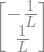

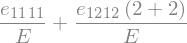

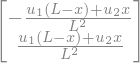

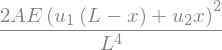

In [33]:

#display(B)
dW = e.dot(Do)
display(dW)

Nu = dN_dx * ua
Nup = dN_dx * uap
display(simplify(Nu))

#Nu2 = E * A * Nu.dot(Nu)
Nu2 = E * A * Nu.dot(Nup)
display(simplify(Nu2))

#dWb = (dN_dx * ua)*(dN_dx * ua)

if 0:
    dW2 = dW.subs(e12, 0.).subs(o11, e11*E).subs(e11, du_dx)
    print('dW2:')
    display(simplify(dW2))

    Nu = dN_dx.dot(ua) #.dot(dN_dx * ua)
    dWb = Nu
    print('dWb:')
    display(simplify(dWb))

dW3:


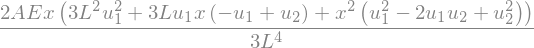

dW4:


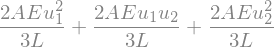

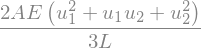

In [34]:
dW3 = integrate(Nu2, x)
print('dW3:')
display(simplify(dW3))
dW4 = dW3.subs('x', L) - dW3.subs('x', 0)
print('dW4:')
display(expand(dW4))
display(simplify(dW4))


In [14]:
# B.dot(D)

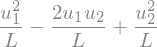

In [16]:
expand(dW4)